In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data for the dataframe
data = {
    'Model': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
    'Type': ['Rule-Based', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Control'],
    'Features': ['Cell Count', 'Cell Count', 'Cell Painting', 'ChemProp', 'Gene Expression', 'Late fusion (cs,ge)', 'Late fusion (cs,ge,mobc)', 'Late fusion (cs,mobc)', 'Late fusion (ge,mobc)', 'y-scrambling'],
    'Mean AUC': [0.640, 0.603, 0.626, 0.609, 0.587, 0.638, 0.654, 0.644, 0.648, 0.502],
    'AUC Std Dev': [0.17, 0.22, 0.224, 0.223, 0.196, 0.195, 0.208, 0.232, 0.202, 0.067],
    'AUC = 1.0': [1, 15, 13, 5, 11, 9, 14, 15, 14, 1],
    'AUC > 0.9': [15, 24, 28, 16, 19, 18, 28, 31, 28, 2],
    'AUC > 0.8': [100, 82, 102, 102, 71, 109, 117, 124, 108, 5],
    'AUC > 0.5': [221, 197, 197, 194, 188, 206, 205, 204, 211, 91]
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Model,Type,Features,Mean AUC,AUC Std Dev,AUC = 1.0,AUC > 0.9,AUC > 0.8,AUC > 0.5
0,a,Rule-Based,Cell Count,0.640,0.170,1,15,100,221
1,b,Supervised,Cell Count,0.603,0.220,15,24,82,197
2,c,Supervised,Cell Painting,0.626,0.224,13,28,102,197
3,d,Supervised,ChemProp,0.609,0.223,5,16,102,194
4,e,Supervised,Gene Expression,0.587,0.196,11,19,71,188
5,f,Supervised,"Late fusion (cs,ge)",0.638,0.195,9,18,109,206
6,g,Supervised,"Late fusion (cs,ge,mobc)",0.654,0.208,14,28,117,205
7,h,Supervised,"Late fusion (cs,mobc)",0.644,0.232,15,31,124,204
8,i,Supervised,"Late fusion (ge,mobc)",0.648,0.202,14,28,108,211
9,j,Control,y-scrambling,0.502,0.067,1,2,5,91


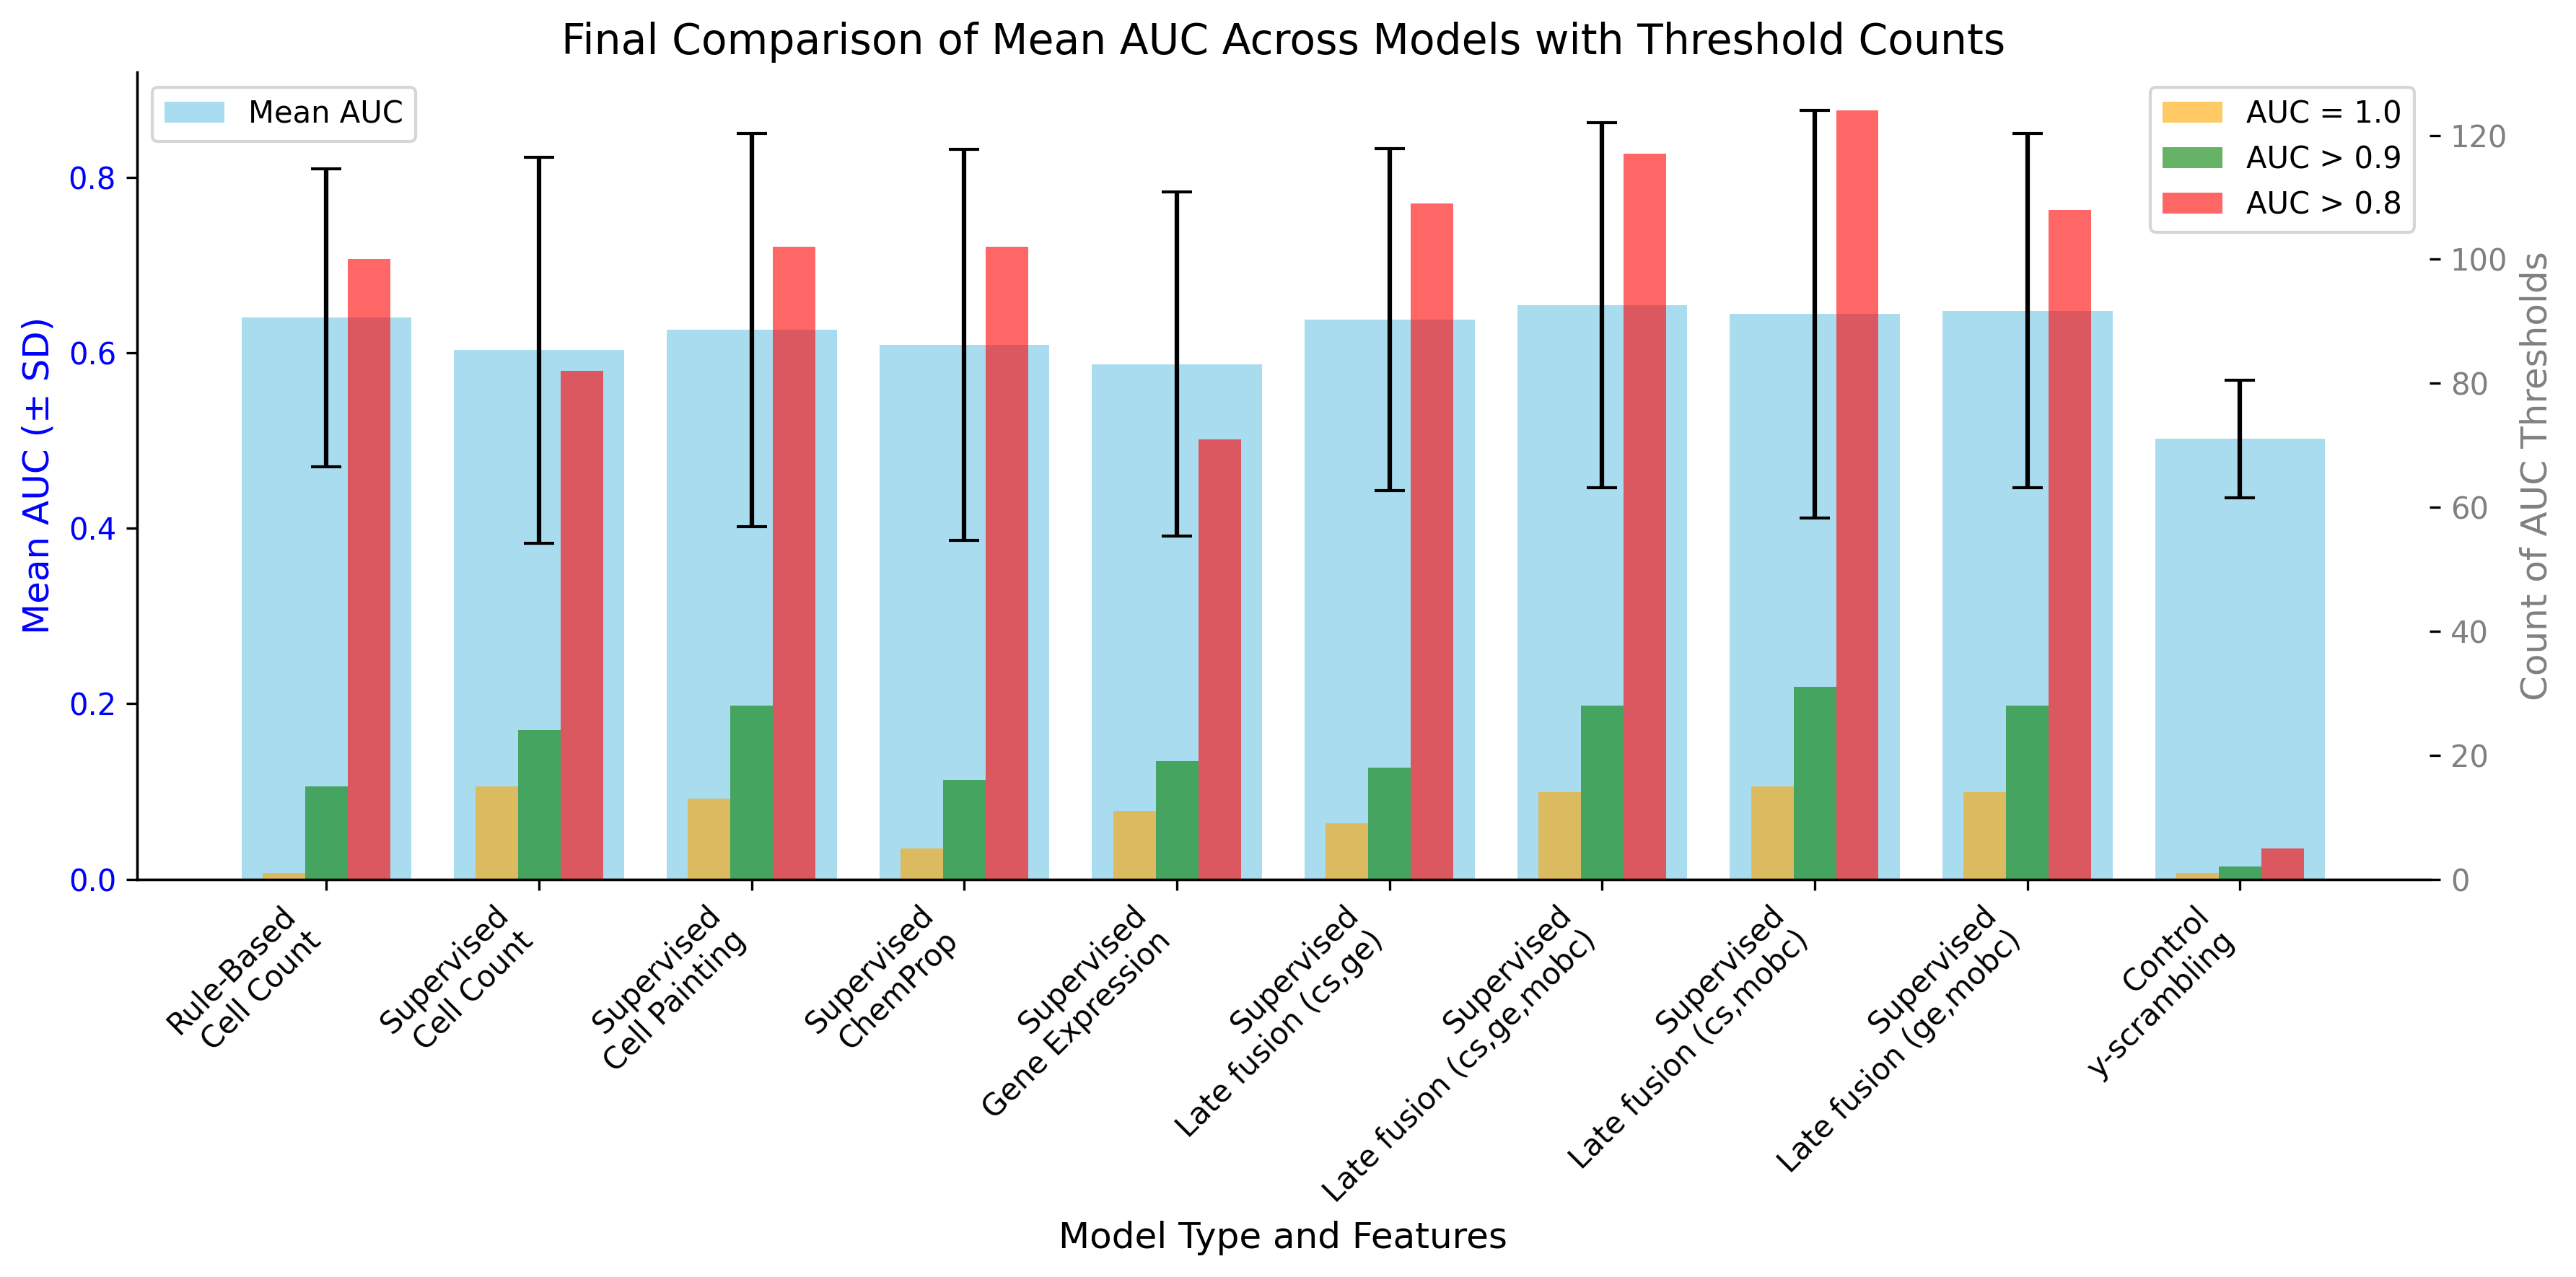

In [4]:

model_indices = np.arange(len(df['Model']))

# Combine 'Type' and 'Method' for x-axis labels
x_labels = [f"{t}\n{m}" for t, m in zip(df['Type'], df['Features'])]

# Convert AUC > 0.5 to numeric, handling 'Not provided'
df['AUC > 0.5'] = pd.to_numeric(df['AUC > 0.5'], errors='coerce')

# Create figure and axes for the final plot
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Bar chart for mean AUC with error bars
ax1.bar(model_indices, df['Mean AUC'], yerr=df['AUC Std Dev'], color='skyblue', capsize=5, label='Mean AUC', alpha=0.7)
ax1.set_xlabel('Model Type and Features', fontsize=12)
ax1.set_ylabel('Mean AUC (± SD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set the new x-axis labels with tilt
ax1.set_xticks(model_indices)
ax1.set_xticklabels(x_labels, rotation=45, ha="right")
ax1.set_title('Final Comparison of Mean AUC Across Models with Threshold Counts', fontsize=14)

# Remove top and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Create a second y-axis for the AUC threshold counts
ax2 = ax1.twinx()
width = 0.2

# Non-stacked bars for threshold counts (as they are cumulative in the dataset)
p1 = ax2.bar(model_indices - width, df['AUC = 1.0'], width, label='AUC = 1.0', color='orange', alpha=0.6)
p2 = ax2.bar(model_indices, df['AUC > 0.9'], width, label='AUC > 0.9', color='green', alpha=0.6)
p3 = ax2.bar(model_indices + width, df['AUC > 0.8'], width, label='AUC > 0.8', color='red', alpha=0.6)

ax2.set_ylabel('Count of AUC Thresholds', fontsize=12, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Remove top and right borders for second axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Add legends and layout adjustments
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show final plot
plt.show()
